In [1]:
from utils import train_generator, train_consumer, evaluate_generator, evaluate_consumer

Training Mode: MM: 100%|██████████| 50000/50000 [01:01<00:00, 813.62it/s, games_played=6745]


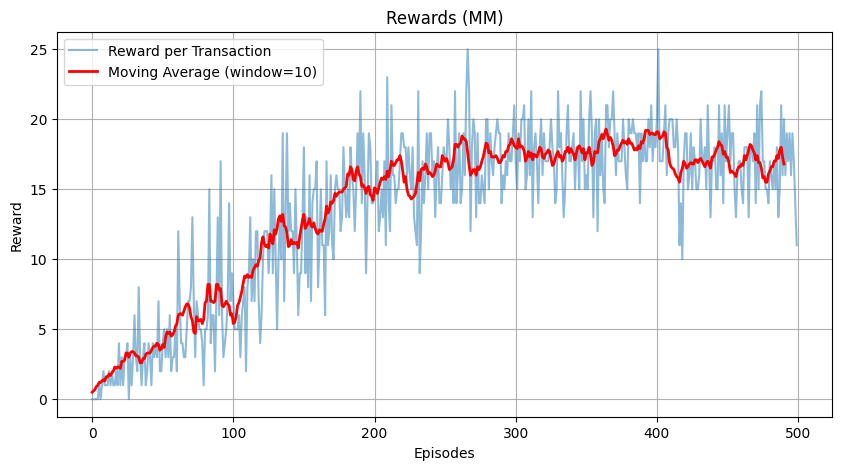

In [2]:
params = {
    'total_steps': 50000,
    'eval_intervals': 100,
    'min_power': 0.1,
    'max_power': 1,
    'min_price': 0.1,
    'max_price': 1,
    'threshold': -0.2,
    'gen_actions': [-0.1, 0.0, 0.1],
    'con_actions': [-0.1, 0.0, 0.1],
    'a': 0.1,
    'b': 2,
    'c': 0,
    'agent_id': 'G'
}

agent_G_trained, agent_C_generic, reward_history, profit_history = train_generator(mode='MM', kwargs=params)


Generator 10 last mean 0.1
Consummer 10 last mean 0.6


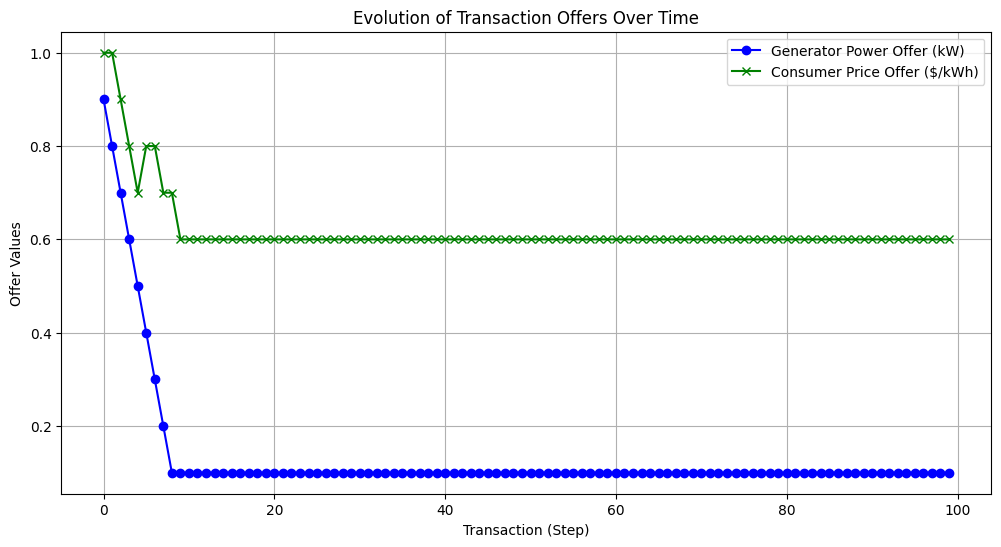

In [3]:
eval_params = params.copy()
eval_params.update({
    'init_gen_power': 0.5,
    'init_con_price': 0.5,
    'total_steps': 100
})

evaluate_generator(agent_G_trained, agent_C_generic, eval_params, evaluate_param=True)

In [19]:
params = {
    'total_steps': 30000,
    'eval_intervals': 100,
    'min_power': 0.1,
    'max_power': 0.5,
    'min_price': 0.1,
    'max_price': 0.5,
    'threshold': 4,
    'gen_actions': [-0.1, 0.0, 0.1],
    'con_actions': [-0.1, 0.0, 0.1],
    'a': 0.1,
    'b': 2,
    'c': 0,
    'agent_id': 'C'
}


agent_G_generic, agent_C_trained, reward_history, profit_history = train_consumer(mode='MM', kwargs=params)

Training Mode: MM:  25%|██▍       | 7382/30000 [00:09<00:27, 812.13it/s, games_played=33]


KeyboardInterrupt: 

Generator 10 last mean 0.6
Consummer 10 last mean 0.1


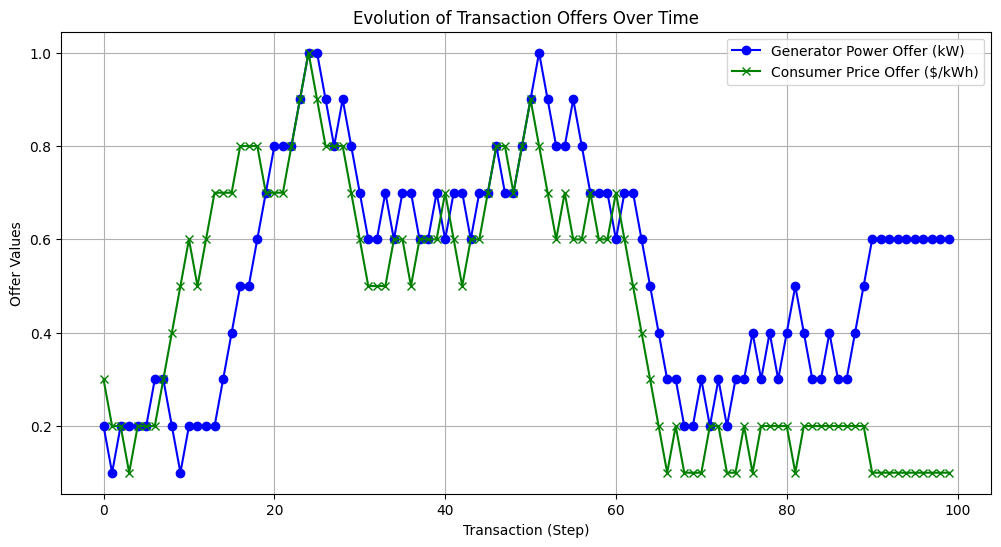

In [13]:
eval_params = params.copy()
eval_params.update({
    'init_gen_power': 0.5,
    'init_con_price': 0.5,
    'total_steps': 100
})

evaluate_consumer(agent_G_generic, agent_C_trained, eval_params, evaluate_param=True)

In [17]:
import numpy as np
from scipy.optimize import minimize, minimize_scalar

# Define the function
def f(vars):
    x, y = vars
    return  x*y - ( 0.1 * x**2 + 2 * x) 
    # return -((x-2)**2+(y-2)**2)+4

# Bounds (choose a reasonable domain for x and y)
bounds = [(params['min_power'], params['max_power']), (params['min_price'], params['max_price'])]

# Minimize
res_min = minimize(f, x0=(0, 0), bounds=bounds)

# To find max, minimize the negative of f
res_max = minimize(lambda vars: -f(vars), x0=(0, 0), bounds=bounds)

print("Minimum:")
print(f"Point: {res_min.x}, Value: {res_min.fun}")

print("\nMaximum:")
print(f"Point: {res_max.x}, Value: {-res_max.fun}")


Minimum:
Point: [0.5 0.1], Value: -0.9749999999999999

Maximum:
Point: [0.1 0.5], Value: -0.15100000000000002


In [18]:
def f(vars):
    x, y = vars
    return x*1/np.log(1+y)
    # return -((x-2)**2+(y-2)**2)+4

# Bounds (choose a reasonable domain for x and y)
bounds = [(params['min_power'], params['max_power']), (params['min_price'], params['max_price'])]

# Minimize
res_min = minimize(f, x0=(0, 0), bounds=bounds)

# To find max, minimize the negative of f
res_max = minimize(lambda vars: -f(vars), x0=(0, 0), bounds=bounds)

print("Minimum:")
print(f"Point: {res_min.x}, Value: {res_min.fun}")

print("\nMaximum:")
print(f"Point: {res_max.x}, Value: {-res_max.fun}")

Minimum:
Point: [0.1 0.5], Value: 0.24663034623764318

Maximum:
Point: [0.5 0.1], Value: 5.246029343628531


In [40]:
import numpy as np 
x = 1
y = 0.1
x*1/np.log(1+y)

10.492058687257062

In [9]:
params = {
    'total_steps': 10000,
    'eval_intervals': 100,
    'init_gen_power': 0.5,
    'init_con_price': 0.5,
    'min_power': 0.1,
    'max_power': 1,
    'min_price': 0.1,
    'max_price': 1,
    'threshold': 0,
    'gen_actions': [-0.1, 0.0, 0.1],
    'con_actions': [-0.1, 0.0, 0.1],
    'a': 0.1,
    'b': 2,
    'c': 0,
    'agent_id': 'C'
}

total_steps = params.get('total_steps', 100)
init_gen_power = params.get('init_gen_power', 0.3)
init_con_price = params.get('init_con_price', 2.0)
min_power = params.get('min_power', 0.1)
max_power = params.get('max_power', 5)
min_price = params.get('min_price', 0.1)
max_price = params.get('max_price', 5)
threshold = params.get('threshold', 1)
gen_actions = params.get('gen_actions', [-0.1, 0.0, 0.1])
con_actions = params.get('con_actions', [-1, 0, 1])
a = params.get('a', 0.1)
b = params.get('b', 2)
c = params.get('c', 0)


from energy_market_env import EnergyMarketEnv
env = EnergyMarketEnv(a, b, c, 
                    init_gen_power, init_con_price,
                    min_power, max_power,
                    min_price, max_price, 
                    threshold,
                    agent_id='C')

GENERATOR_ACTIONS = gen_actions  # Power adjustments
CONSUMER_ACTIONS = con_actions         # Price adjustments

gen_states = []
con_states = []

gen_state, con_state = env.reset()
state = (gen_state, con_state)

print(state)

(0.9, 0.3)


In [10]:
import numpy as np
x = 0.7
y = 0.7
x*np.log(1/(1+y))

-0.3714397757435192

In [11]:
env.step({'generator': 0, 'consumer': -0})


((0.9, 0.3), {'generator': -1, 'consumer': 1}, True)

In [12]:
print(env.gen_power, env.con_price)

0.9 0.3


In [13]:
env.con_profit

3.4303452180375613

In [14]:
gen_power = env.gen_power
con_price = env.con_price
gen_power * np.log(1/(1+con_price))

-0.236127838020742

In [15]:
import random
  
GENERATOR_ACTIONS = gen_actions  # Power adjustments
CONSUMER_ACTIONS = con_actions         # Price adjustments

gen_states = []
con_states = []

gen_state, con_state = env.reset()
state = (gen_state, con_state)

next_state = state

print(state)

(0.6, 0.4)


In [16]:


    
gen_states.append(next_state[0])
con_states.append(next_state[1])

action_G = agent_G.select_action(state, evaluate=True)
if agent_C is None:
    action_C = random.choice(CONSUMER_ACTIONS)
else:
    action_C = agent_C.select_action(state, evaluate=True)

next_state, reward, _ = env.step({'generator': action_G, 'consumer': action_C})

print(state, action_C, next_state)

state = next_state


NameError: name 'agent_G' is not defined

In [ ]:
round(random.uniform(1.5, 3.7), 1)

3.2